In [1]:
# Point to configuration files
import sys
sys.path.append('/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2')
# Import python packages required for analysis
from setup import *
# Import CAF Plotting libraries
import plot_manager
importlib.reload(plot_manager)

DUNE plot style enabled


<module 'plot_manager' from '/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2/plot_manager.py'>

In [2]:
def rho_a(Z,e,r_array,R):
    result=[]
    for r in r_array:
        if r==R:
            result.append(Z*e/(4*np.pi*R**2))
        else:
            result.append(0)
    return result

def rho_b(Z,e,r_array,R):
    result=[]
    for r in r_array:
        if r<=R:
            denominator = (4/3)*np.pi*(4*R/3)**3
            result.append(Z*e/denominator)
        else:
            result.append(0)
    return result

def rho_c(Z,e,r,R):
    denominator = 8*np.pi*R**3
    return (27*Z*e/denominator)*np.exp(-3*r/R)

FQ2_a = lambda q,R,Z,e : Z*e*np.sin(q*R)/(q*R)

FQ2_b = lambda q,R,Z,e : (3*Z*e/(4*q*R/3)**3)*(np.sin(4*q*R/3) - (4*q*R/3)*np.cos(4*q*R/3))

FQ2_c = lambda q,R,Z,e : 81*Z*e/(9+(q*R)**2)**2

In [3]:
Z,e,R = 1,1,1
r_range = np.arange(0,2,0.01)
q_range = np.arange(0,10000,0.01)

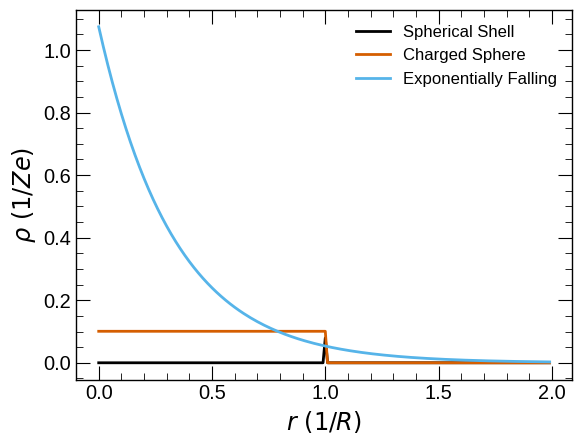

In [12]:
plt.plot(r_range, rho_a(Z,e,r_range,R), label='Spherical Shell')
plt.plot(r_range, rho_b(Z,e,r_range,R), label='Charged Sphere')
plt.plot(r_range, rho_c(Z,e,r_range,R), label='Exponentially Falling')
plt.xlabel(f'$r\ (1/R)$')
plt.ylabel(f'$\\rho\ (1/Ze)$')
plt.legend()

/tmp/ipykernel_680979/764926347.py:24: RuntimeWarning: invalid value encountered in divide
  FQ2_a = lambda q,R,Z,e : Z*e*np.sin(q*R)/(q*R)
/tmp/ipykernel_680979/764926347.py:26: RuntimeWarning: divide by zero encountered in divide
  FQ2_b = lambda q,R,Z,e : (3*Z*e/(4*q*R/3)**3)*(np.sin(4*q*R/3) - (4*q*R/3)*np.cos(4*q*R/3))
/tmp/ipykernel_680979/764926347.py:26: RuntimeWarning: invalid value encountered in multiply
  FQ2_b = lambda q,R,Z,e : (3*Z*e/(4*q*R/3)**3)*(np.sin(4*q*R/3) - (4*q*R/3)*np.cos(4*q*R/3))


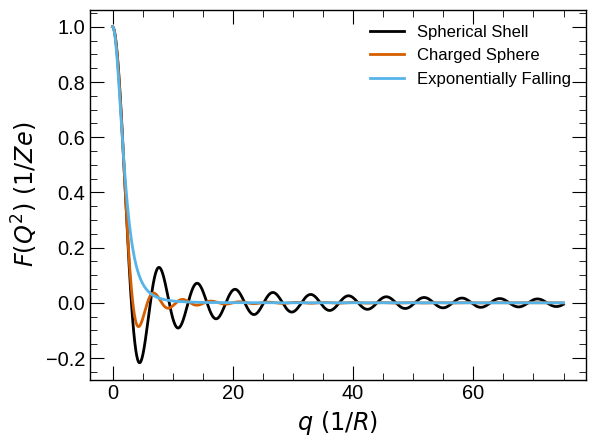

In [11]:
r_range = np.arange(0,2,0.01)
q_range = np.arange(0,75,0.01)
plt.plot(q_range, FQ2_a(q_range,R,Z,e), label='Spherical Shell')
plt.plot(q_range, FQ2_b(q_range,R,Z,e), label='Charged Sphere')
plt.plot(q_range, FQ2_c(q_range,R,Z,e), label='Exponentially Falling')
plt.xlabel(f'$q\ (1/R)$')
plt.ylabel(f'$F(Q^2)\ (1/Ze)$')
#plt.yscale('log')
plt.legend()